In [1]:
##customer churn analysis project##

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import csv
import tensorflow as tf
import gzip
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report

In [4]:
#importing dataset 
train_df = pd.read_csv("customer_churn_dataset-testing-master.csv") #for eda/processing/training, etc. 
test_df = pd.read_csv("customer_churn_dataset-training-master.csv") #evaluating how well the model performs

train_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


### Clarifications on Dataset Features
- **Churn**: whether or not the customer has stopped using the service, 
   - "1" = stopped subscription
   - "0" = continuing user
- **Tenure**: the number of months the customer has been with the service. 
- **Usage Frequency**: number of times the customer has used the service during a set period. 


### Questions to answer: 
1. Does gender play a difference in churn rate, are women/male more likely? 
2. At what age range does the likelihood of churn start to increase? 
   - identify which age bracket are more prone to leaving 
3. Does subscription type matter? Payment delay? Other features!
4. Does usage frequency play an effect in the likelihood of churn? 
   - (i) using the service more frequently = more engagement = lower churn rate 
   - (ii) using service rarely = less engagement = higher churn rate 


In [5]:
train_df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [6]:
test_df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [7]:
#change categorical data types to be numerical: 
train_df['Gender'] = train_df['Gender'].str.strip().str.capitalize()
train_df["Gender"] = train_df["Gender"].map({"Female" : 1, "Male" : 0})
train_df.head()



,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,1,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,1,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,0,27,10,2,29,Premium,Annual,757,21,0
3,4,35,0,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,1,58,24,9,2,Standard,Annual,533,18,0


In [8]:
train_df.describe()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,0.533647,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,0.498870,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,0.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,0.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,1.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,1.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,1.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Taking the general statistics again shows us that there are slightly more females than there are males, with 53.3% of dataset being female. 
Let's see how many women have churned and how many women have churned with a bar plot. 

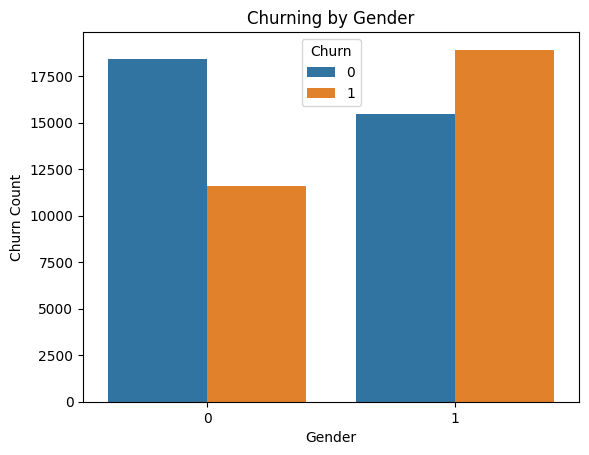

In [9]:
#creating a bar graph to see how many have/haven't churned for each gender using seaborn 
#sns.countplot(data= , x= , hue=) where hue is splitting x categories apart by a certain feature, in this case, churn. 
sns.countplot(data=train_df, x='Gender', hue='Churn')
plt.title("Churning by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Count")

plt.show()

In [10]:
#how many people churned overall? 
total_churned = len(train_df[(train_df["Churn"] == 1)])
print("the total number of people who have churned is ", total_churned)
print()
#number of women & number of men : 
num_female = len(train_df[train_df["Gender"] == 1])
num_male = len(train_df[train_df["Gender"] == 0])
print("female num: ", num_female)
print("male_num: ", num_male)
print()

#how many of those churned
female_churn = train_df[(train_df["Gender"] == 1) & (train_df["Churn"] == 1)]
female_count = len(female_churn)
print("number of women who churned: ", female_count)
male_churn= train_df[(train_df["Gender"] == 0) & (train_df["Churn"] == 1)]
male_count = len(male_churn)
print("number of male who churned: ", male_count)

print()
print("OUT OF ALL CUSTOMERS")
total = len(train_df)
female_percent = (female_count/total) * 100 
male_percent = (male_count/total) * 100
print("percentage of women churning: ", female_percent)
print("percentage of male churning: ", male_percent)



the total number of people who have churned is  30493

female num:  34353
male_num:  30021

number of women who churned:  18911
number of male who churned:  11582

OUT OF ALL CUSTOMERS
percentage of women churning:  29.37676701774008
percentage of male churning:  17.99173579395408


In [11]:
#however, we're trying to see if gender plays a role in churning, i.e, are women more likely to churn than men? 
print() 
print("OUT OF ONLY THOSE WHO CHURNED: ") 
female_churn_percent = (female_count/total_churned) * 100 
male_churned_percent = (male_count/total_churned) * 100 
print("percentage of women who churned: ", female_churn_percent)
print("percent of male who churned: ", male_churned_percent)




OUT OF ONLY THOSE WHO CHURNED: 
percentage of women who churned:  62.0175122159184
percent of male who churned:  37.98248778408159


### Uncovering Question 1:
Although women only make up a *slightly* larger population of the dataset than men, we see a *dramatic* difference when comparing the percentage of men and women who have churned, both in those who have churned and overall. Thus, we are able to say that more women are likely to churn than men.

## Now let's look at other features of the dataset: 

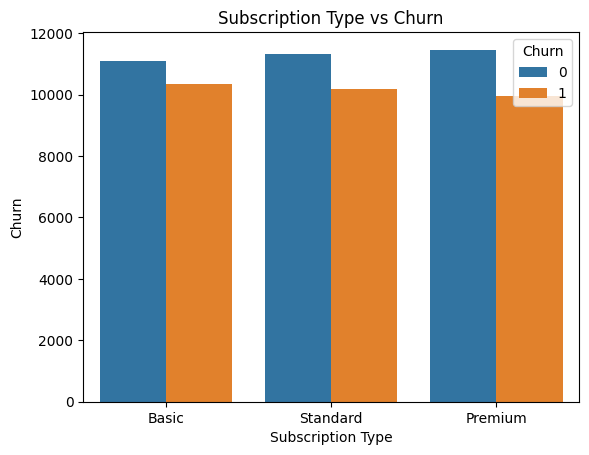

In [12]:
#looking at subscription type data for curiosity:
sns.countplot(data=train_df, x= "Subscription Type", hue="Churn")
plt.title("Subscription Type vs Churn")
plt.xlabel("Subscription Type")
plt.ylabel("Churn")
plt.show()

In [13]:
#how many individuals had the basic, standard, and premium types and also churned: 
basic_sub_churn = len(train_df[(train_df["Subscription Type"] == "Basic") & (train_df["Churn"] == 1)])
print("basic_sub_churn:", basic_sub_churn)

standard_sub_churn = len(train_df[(train_df["Subscription Type"] == "Standard") & (train_df["Churn"] == 1)])
print("standard_sub_churn: ", standard_sub_churn)

premium_sub_churn = len(train_df[(train_df["Subscription Type"] == "Premium") & (train_df["Churn"] == 1)])
print("premium_sub_churn: " , premium_sub_churn)

#in such a large dataset, with total_churned being ~30k, such a small difference of 217 between standard sub churners and premium sub churners is practically 
#neglible. 

basic_sub_churn: 10356
standard_sub_churn:  10177
premium_sub_churn:  9960


## Let's see if there's a correlation between payment delay and churning: 

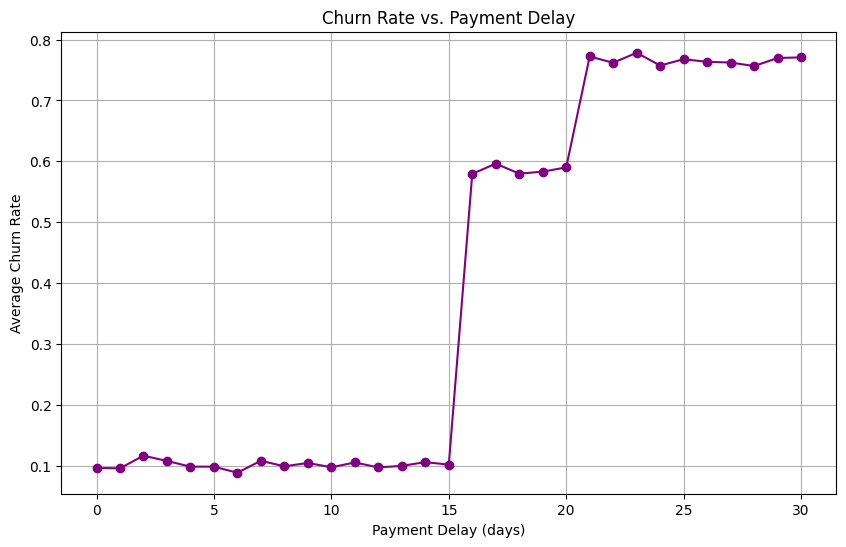

In [14]:
#showing average churn rate by each payment delay value: 
churn_by_delay = train_df.groupby("Payment Delay")["Churn"].mean()

#initializing figures: 
plt.figure(figsize=(10, 6))
plt.plot(churn_by_delay.index, churn_by_delay.values, marker='o', color='purple')
plt.title("Churn Rate vs. Payment Delay")
plt.xlabel("Payment Delay (days)")
plt.ylabel("Average Churn Rate")
plt.grid(True)
plt.show()

In [15]:
#this graph shows a sharp increase in churn values at the payment delay of 15 days and another at 20 days. lets see where these spikes are! 
churn_by_delay.loc[[15,20]]


Payment Delay
15    0.101513
20    0.589912
Name: Churn, dtype: float64

As we can see here immediately, this is a *huge* difference! Between the 15 day payment delay and the 20 day payment delay, churn increases by nearly six times!
This is suggesting that there is something about the 20 day payment delay that is causing customers to start churning. Let's see if the number of support calls plays a factor in this. 



In [16]:
train_df["Support Calls"]
max_customer_calls = train_df["Support Calls"].max()
print(max_customer_calls)

max_call_customers = train_df[train_df["Support Calls"] == max_customer_calls]
len(max_call_customers)

#lets check how many of these max call customers have churned, my guess is all of them: 
num = train_df[(train_df["Support Calls"] == max_customer_calls) & (train_df["Churn"] == 1)]
print(len(num))



10
3998


In [17]:
train_df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,1,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,1,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,0,27,10,2,29,Premium,Annual,757,21,0
3,4,35,0,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,1,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,1,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,0,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,0,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,1,18,19,7,22,Standard,Monthly,540,13,1


Text(0, 0.5, 'Churn')

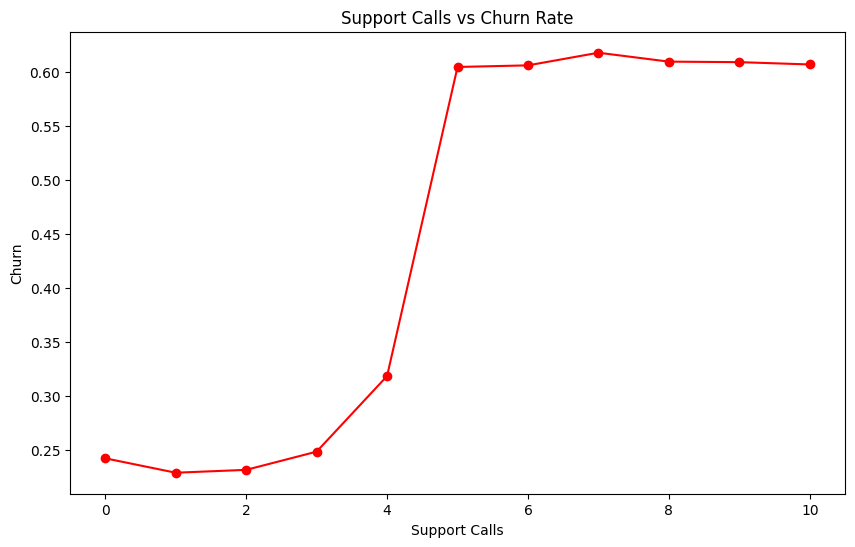

In [18]:
#showing average churn rate by support calls cateogry: 
churn_by_calls = train_df.groupby("Support Calls")["Churn"].mean()

plt.figure(figsize=(10, 6))
plt.plot(churn_by_calls.index, churn_by_calls.values, marker='o', color='red')
plt.title("Support Calls vs Churn Rate")
plt.xlabel("Support Calls")
plt.ylabel("Churn")

Evidently, there is a positive correlation between support call numbers and the likelihood of churn. Churn rates significantly increase for customers who made 4 or more support calls, suggesting there is a key sign of dissatisfaction. 

## Training The Model

In [19]:
chosen_features = ["Support Calls",
                   "Payment Delay",
                   "Subscription Type"]
#subscription type is categorical, one-hot encoding: 
train_df_encoded = pd.get_dummies(train_df[chosen_features], drop_first=True).dropna()

test_df_encoded = pd.get_dummies(test_df[chosen_features], drop_first=True).dropna()


test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)
print(test_df_encoded.head())



   Support Calls  Payment Delay  Subscription Type_Premium  \
0            5.0           18.0                      False   
1           10.0            8.0                      False   
2            6.0           18.0                      False   
3            7.0            7.0                      False   
4            5.0            8.0                      False   

   Subscription Type_Standard  
0                        True  
1                       False  
2                       False  
3                        True  
4                       False  


In [20]:
X_train = train_df_encoded
y_train = train_df["Churn"]
X_test = test_df_encoded
y_test = test_df["Churn"]

In [21]:
#correcting shape issue: 
test_data = test_df.dropna(subset=["Churn", "Support Calls", "Payment Delay", "Subscription Type"])
X_test = pd.get_dummies(test_data[chosen_features], drop_first=True)
y_test = test_data["Churn"]

# Ensure both have the same number of rows
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_test: (440832, 4)
Shape of y_test: (440832,)


In [22]:
#training the model: 
model = LogisticRegression(class_weight="balanced",max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
#Error Metrics: 
def BER(pred, y):
    TP = np.sum([(p and l) for (p,l) in zip(pred, y)])
    FP = np.sum([(p and not l) for (p,l) in zip(pred, y)])
    TN = np.sum([(not p and not l) for (p,l) in zip(pred, y)])
    FN = np.sum([(not p and l) for (p,l) in zip(pred, y)])
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    BER = 1 - 1/2 * (TPR + TNR)
    return BER

In [24]:
def accuracy(predictions, y):
    correct = predictions == y # Binary vector indicating which predictions were correct
    return sum(correct) / len(correct)

In [25]:
acc = accuracy(y_pred, y_test) * 100
acc

65.93985917537746

In [26]:
#using random forest classifier 
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
predictions = forest_model.predict(X_test)
accuracy2 = accuracy(predictions, y_test)
accuracy2

0.6567740091463414

Both Logistic Regression and Random Forest Classifier are resulting in a similar accuracy level. Let's try others like Gradient Boosting Classifier!

## Gradient Boosting Classifier 
The Historgram based learning especially uses an algorithm that reduces computational complexity and speeds up training process in comparison to the standard gradient boosting classifier. Another benefit is it's efficiency when handling larger datasets and it can scale much better.


In [27]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
accuracy_gb = accuracy(gb_predictions, y_test)
accuracy_gb

0.6750122495644599

In [44]:
hist_model = HistGradientBoostingClassifier(class_weight='balanced', random_state=42)
hist_model.fit(X_train, y_train)


hist_predictions = hist_model.predict(X_test)
#probabilities for each class 
hist_prob = hist_model.predict_proba(X_test)[:, 1]  # Needed for ROC AUC
threshold = 0.3
new_hist_predictions = (hist_prob >= threshold).astype(int)

# Metrics
for t in [0.3, 0.2, 0.15, 0.1]:
    preds = (hist_prob >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, preds, zero_division=0))


Threshold: 0.3
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.73    190833
         1.0       1.00      0.43      0.60    249999

    accuracy                           0.68    440832
   macro avg       0.78      0.71      0.66    440832
weighted avg       0.81      0.68      0.65    440832


Threshold: 0.2
              precision    recall  f1-score   support

         0.0       0.57      0.99      0.73    190833
         1.0       0.99      0.43      0.60    249999

    accuracy                           0.68    440832
   macro avg       0.78      0.71      0.66    440832
weighted avg       0.81      0.68      0.66    440832


Threshold: 0.15
              precision    recall  f1-score   support

         0.0       0.68      0.94      0.79    190833
         1.0       0.94      0.67      0.78    249999

    accuracy                           0.79    440832
   macro avg       0.81      0.80      0.79    440832
weighted avg       0.83  

## Final Statements
After trial and error as well as further analysis of different models and their pros and cons, we were able to find a high accuracy level with the HistGradientBoostingClassifier.

Through the classification report, we can clearly see that the threshold that returns us the best accuracy is 0.15. However, because this is a lower threshold, it's important to take note of the pros and cons, ensuring that the f1-score is equally balanced. A lower threshold *does* mean that the model is more sensitive to positives . 
As the f1-score is stated as a 0.84, incredibly close to the accuracy, we can take this lower threshold as our final accuracy value. The f1-score indicates the trade-off that is taking place between recall and precision, telling us that it is quite balanced. 